In [56]:
import numpy as np
import pandas as pd
import utils
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
subjs = utils.ExpInfo.getSubjIDs()
task = utils.ExpInfo.taskName[0]


In [ ]:
subj = subjs[0]
x, h, y = utils.LoadData.xhy(subj, task)
x_disp, h_disp, y_disp = utils.LoadData.xhy_disp(subj, task)

In [43]:
df_beh = utils.LoadData.behaviorData(subj, task)

In [87]:
prob_rank = []
for iTrial in range(len(h)):
    # compute diff dist
    diff = h_disp[iTrial] - h[iTrial][:-1]    
    mu = diff.mean(axis=0)
    cov = np.cov(diff.T)

    # fit 
    vr = multivariate_normal(mu, cov)

    # compute prob rank
    c = np.zeros((1, diff.shape[1]))
    probs = vr.pdf(np.concatenate((c, diff)))
    log_probs_p = np.log(probs)
    
    
    # ----------------------------------------------------------------------------
    diff = np.diff(h_disp[iTrial], axis=0) - np.diff(h[iTrial][:-1], axis=0)
    
    mu = diff.mean(axis=0)
    cov = np.cov(diff.T)

    # fit multivariate_normal
    vr = multivariate_normal(mu, cov)

    # compute prob rank
    c = np.zeros((1, diff.shape[1]))
    probs = vr.pdf(np.concatenate((c, diff)))
    log_probs_v = np.log(probs)

    # ----------------------------------------------------------------------------
    log_probs = log_probs_p[:-1] #+ log_probs_v
    prob_rank_=  np.where(np.argsort(log_probs)==0)[0][0] / diff.shape[0]
    prob_rank.append(prob_rank_)

<AxesSubplot:xlabel='actual control', ylabel='response'>

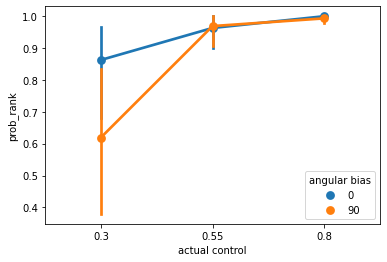

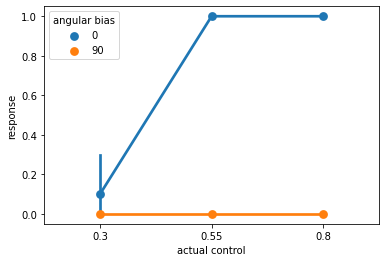

In [88]:
df_beh_ = df_beh.copy()
df_beh_['prob_rank'] = prob_rank

plt.figure()
sns.pointplot(y='prob_rank', x='actual control', hue='angular bias', data=df_beh_)

plt.figure()
sns.pointplot(y='response', x='actual control', hue='angular bias', data=df_beh_)